In [1]:
%cd ../data-science-from-scratch/

C:\Users\mattt_000\Documents\MachineLearning101\MachineLearning101\data-science-from-scratch


In [4]:
#Import a list of users and a list of friendship pairs
from scratch.introduction import users, friendship_pairs

display(users)
display(friendship_pairs)

[{'id': 0, 'name': 'Hero'},
 {'id': 1, 'name': 'Dunn'},
 {'id': 2, 'name': 'Sue'},
 {'id': 3, 'name': 'Chi'},
 {'id': 4, 'name': 'Thor'},
 {'id': 5, 'name': 'Clive'},
 {'id': 6, 'name': 'Hicks'},
 {'id': 7, 'name': 'Devin'},
 {'id': 8, 'name': 'Kate'},
 {'id': 9, 'name': 'Klein'}]

[(0, 1),
 (0, 2),
 (1, 2),
 (1, 3),
 (2, 3),
 (3, 4),
 (4, 5),
 (5, 6),
 (5, 7),
 (6, 8),
 (7, 8),
 (8, 9)]

In [9]:
#Create a dictionary with a list of the friends for each user

friendships = {user['id']:[] for user in users}
#look over the friendship pairs to populate it
for i,j in friendship_pairs:
    friendships[i].append(j) #add j as a friend of i
    friendships[j].append(i) #add i as a friend of j
display(friendships)

{0: [1, 2],
 1: [0, 2, 3],
 2: [0, 1, 3],
 3: [1, 2, 4],
 4: [3, 5],
 5: [4, 6, 7],
 6: [5, 8],
 7: [5, 8],
 8: [6, 7, 9],
 9: [8]}

In [13]:
def number_of_friends(user):
    """How many friends does _user_ have?"""
    user_id = user["id"]
    friends_ids = friendships[user_id]
    return len(friends_ids)

total_connections = sum(number_of_friends(user) for user in users)
display(total_connections)
display(len(friendship_pairs)*2)

24

24

In [15]:
#Average number of friends
num_users = len(users)
avg_connections = total_connections/num_users
display(avg_connections)

2.4

In [20]:
#Sort the users from most friends to least friends
number_of_friends_by_id = [(user['id'], number_of_friends(user)) 
                           for user in users]
number_of_friends_by_id.sort(
    key=lambda id_and_friends: id_and_friends[1],
    reverse=True)

display(number_of_friends_by_id)

#This is the network metric, "degree centrality". The number of links per users

[(1, 3),
 (2, 3),
 (3, 3),
 (5, 3),
 (8, 3),
 (0, 2),
 (4, 2),
 (6, 2),
 (7, 2),
 (9, 1)]

In [25]:
#Friends of friends/people you may know
def foaf_ids_bad(user): #friends of a friends - bad way using iterator
    """foaf is short for "friend of a friend" """
    return [foaf_id
            for friend_id in friendships[user['id']]
            for foaf_id in friendships[friend_id]]

display(foaf_ids_bad(users[0]))
#This includes duplicates
#Also includes direct friends
#Also includes people who are already friends

[0, 2, 3, 0, 1, 3]

In [31]:
#Produce a count of mutual friends and exclude people already known
from collections import Counter

def friends_of_friends(user):
    user_id = user['id']
    return Counter(
        foaf_id
        for friend_id in friendships[user_id]    # For each of my friends
        for foaf_id in friendships[friend_id]   # find their friends
        if foaf_id != user_id                   # who aren't me
        and foaf_id not in friendships[user_id] # and aren't my friends
    )

uid = 3

display(f'Friends of user_id:{uid}, {users[uid]["name"]}')
display(friends_of_friends(users[3])) #fof of user 3
display(f'Two mutual friends with id 0, and 1 mutual friend with id 5')

'Friends of user_id:3, Chi'

Counter({0: 2, 5: 1})

'Two mutual friends with id 0, and 1 mutual friend with id 5'

In [36]:
#Import a list of interests for each user
from scratch.introduction import interests
print(interests)

[(0, 'Hadoop'), (0, 'Big Data'), (0, 'HBase'), (0, 'Java'), (0, 'Spark'), (0, 'Storm'), (0, 'Cassandra'), (1, 'NoSQL'), (1, 'MongoDB'), (1, 'Cassandra'), (1, 'HBase'), (1, 'Postgres'), (2, 'Python'), (2, 'scikit-learn'), (2, 'scipy'), (2, 'numpy'), (2, 'statsmodels'), (2, 'pandas'), (3, 'R'), (3, 'Python'), (3, 'statistics'), (3, 'regression'), (3, 'probability'), (4, 'machine learning'), (4, 'regression'), (4, 'decision trees'), (4, 'libsvm'), (5, 'Python'), (5, 'R'), (5, 'Java'), (5, 'C++'), (5, 'Haskell'), (5, 'programming languages'), (6, 'statistics'), (6, 'probability'), (6, 'mathematics'), (6, 'theory'), (7, 'machine learning'), (7, 'scikit-learn'), (7, 'Mahout'), (7, 'neural networks'), (8, 'neural networks'), (8, 'deep learning'), (8, 'Big Data'), (8, 'artificial intelligence'), (9, 'Hadoop'), (9, 'Java'), (9, 'MapReduce'), (9, 'Big Data')]


In [38]:
#A function to return users who have a certain interest
def data_scientists_who_like(target_interest):
    """Find the ids of all users who like the target interest."""
    return [user_id
           for user_id, user_interest in interests
           if user_interest == target_interest]

display(data_scientists_who_like('Python'))
#This works, but it's not efficient beccause every element of the list has to be searched for each search

[2, 3, 5]

In [44]:
#Build and index from interests to users
from collections import defaultdict

#Keys are interst, values are lists of user_ids with that interest
user_ids_by_interest = defaultdict(list)
for user_id, interest in interests:
    user_ids_by_interest[interest].append(user_id)
    
#Another index, this time from user_id to interest
interests_by_user_id = defaultdict(list)
for user_id, interest in interests:
    interests_by_user_id[user_id].append(interest)
    
display(user_ids_by_interest)
display(interests_by_user_id)

defaultdict(list,
            {'Hadoop': [0, 9],
             'Big Data': [0, 8, 9],
             'HBase': [0, 1],
             'Java': [0, 5, 9],
             'Spark': [0],
             'Storm': [0],
             'Cassandra': [0, 1],
             'NoSQL': [1],
             'MongoDB': [1],
             'Postgres': [1],
             'Python': [2, 3, 5],
             'scikit-learn': [2, 7],
             'scipy': [2],
             'numpy': [2],
             'statsmodels': [2],
             'pandas': [2],
             'R': [3, 5],
             'statistics': [3, 6],
             'regression': [3, 4],
             'probability': [3, 6],
             'machine learning': [4, 7],
             'decision trees': [4],
             'libsvm': [4],
             'C++': [5],
             'Haskell': [5],
             'programming languages': [5],
             'mathematics': [6],
             'theory': [6],
             'Mahout': [7],
             'neural networks': [7, 8],
             'deep learning': 

defaultdict(list,
            {0: ['Hadoop',
              'Big Data',
              'HBase',
              'Java',
              'Spark',
              'Storm',
              'Cassandra'],
             1: ['NoSQL', 'MongoDB', 'Cassandra', 'HBase', 'Postgres'],
             2: ['Python',
              'scikit-learn',
              'scipy',
              'numpy',
              'statsmodels',
              'pandas'],
             3: ['R', 'Python', 'statistics', 'regression', 'probability'],
             4: ['machine learning', 'regression', 'decision trees', 'libsvm'],
             5: ['Python',
              'R',
              'Java',
              'C++',
              'Haskell',
              'programming languages'],
             6: ['statistics', 'probability', 'mathematics', 'theory'],
             7: ['machine learning',
              'scikit-learn',
              'Mahout',
              'neural networks'],
             8: ['neural networks',
              'deep learning',
       

In [52]:
#To find out who has the most interests in common with a given user:
def most_common_interests_with(user):
    return Counter(
        interested_user_id
        for interest in interests_by_user_id[user['id']]    #get this users interests
        for interested_user_id in user_ids_by_interest[interest]  #get all the users with this interest
        if interested_user_id != user['id']
    )

display(most_common_interests_with(users[0]))

display(interests_by_user_id[0])
display(interests_by_user_id[9])

Counter({9: 3, 8: 1, 1: 2, 5: 1})

['Hadoop', 'Big Data', 'HBase', 'Java', 'Spark', 'Storm', 'Cassandra']

['Hadoop', 'Java', 'MapReduce', 'Big Data']

In [53]:
#Import a list of salaries and tenures
from scratch.introduction import salaries_and_tenures
print(salaries_and_tenures)

[(83000, 8.7), (88000, 8.1), (48000, 0.7), (76000, 6), (69000, 6.5), (76000, 7.5), (60000, 2.5), (83000, 10), (48000, 1.9), (63000, 4.2)]


In [56]:
[sat[0] for sat in salaries_and_tenures]

[83000, 88000, 48000, 76000, 69000, 76000, 60000, 83000, 48000, 63000]

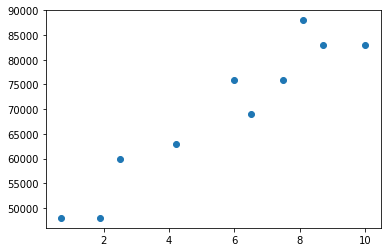

In [58]:
#plot the data
import matplotlib.pyplot as plt
plt.scatter([sat[1] for sat in salaries_and_tenures], [sat[0] for sat in salaries_and_tenures])
plt.show()

In [61]:
#Average salary for each tenure
# Keys are years, values are lists of the salaries for each tenure
salary_by_tenure = defaultdict(list)

for salary, tenure in salaries_and_tenures:
    salary_by_tenure[tenure].append(salary)

#Keys are years, each value is average salary for that tenure
average_salary_by_tenure = {
    tenure: sum(salaries) / len(salaries)
    for tenure,salaries in salary_by_tenure.items()
}

display (salary_by_tenure)
display(average_salary_by_tenure)

defaultdict(list,
            {8.7: [83000],
             8.1: [88000],
             0.7: [48000],
             6: [76000],
             6.5: [69000],
             7.5: [76000],
             2.5: [60000],
             10: [83000],
             1.9: [48000],
             4.2: [63000]})

{8.7: 83000.0,
 8.1: 88000.0,
 0.7: 48000.0,
 6: 76000.0,
 6.5: 69000.0,
 7.5: 76000.0,
 2.5: 60000.0,
 10: 83000.0,
 1.9: 48000.0,
 4.2: 63000.0}

In [66]:
#bucket the tenures to make it more useful

def tenure_bucket(tenure):
    if tenure < 2:
        return "less than two"
    elif tenure < 5:
        return "between two and five"
    else:
        return "more than five"
    
salary_by_tenure_bucket = defaultdict(list)

for salary, tenure in salaries_and_tenures:
    bucket = tenure_bucket(tenure)
    salary_by_tenure_bucket[bucket].append(salary)
    
#compute the average for each bucket
average_salary_by_bucket = {
    bucket: sum(salaries) / len(salaries)
    for bucket,salaries in salary_by_tenure_bucket.items()
}

display(average_salary_by_bucket)

{'more than five': 79166.66666666667,
 'less than two': 48000.0,
 'between two and five': 61500.0}

In [69]:
#Paid accounts - develop a model
def predict_paid_or_unpaid(years_experience):
    if years_experience < 3.0:
        return "paid"
    elif years_experience < 8.5:
        return "unpaid"
    else:
        return "paid"
    
display(predict_paid_or_unpaid(5))
display(predict_paid_or_unpaid(10))
display(predict_paid_or_unpaid(-500))

'unpaid'

'paid'

'paid'

In [77]:
#Most popular topics of interest

#lowercase the interest
#split it into words
#count the results

words_and_counts = Counter(word
                          for user, interest in interests
                          for word in interest.lower().split())

for word,count in words_and_counts.most_common():
    if count>1:
        print(f'{word}:{count}')

big:3
data:3
java:3
python:3
learning:3
hadoop:2
hbase:2
cassandra:2
scikit-learn:2
r:2
statistics:2
regression:2
probability:2
machine:2
neural:2
networks:2
